In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Đọc dữ liệu:
data = pd.read_csv('Diet_R.csv')
data.head()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


In [4]:
# Vì Person 25, 26 thiếu dữ liệu ở Gender -> loại 
df = data.drop([0, 1])
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [5]:
# Sắp xếp index 

df = df.set_index('Person')
df = df.sort_index()
df

,gender,Age,Height,pre.weight,Diet,weight6weeks
Person,,,,,,
1,0,22,159,58,1,54.2
2,0,46,192,60,1,54.0
3,0,55,170,64,1,63.3
4,0,33,171,64,1,61.1
5,0,50,170,65,1,62.2
...,...,...,...,...,...,...
74,1,35,183,83,3,80.2
75,1,49,177,84,3,79.9
76,1,28,164,85,3,79.7


In [6]:
df.isna().any()

gender          False
Age             False
Height          False
pre.weight      False
Diet            False
weight6weeks    False
dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 1 to 78
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        76 non-null     object 
 1   Age           76 non-null     int64  
 2   Height        76 non-null     int64  
 3   pre.weight    76 non-null     int64  
 4   Diet          76 non-null     int64  
 5   weight6weeks  76 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 4.2+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,76.0,39.223684,9.908379,16.0,32.50,39.00,47.250,60.0
Height,76.0,170.776316,11.419981,141.0,163.75,169.00,175.250,201.0
pre.weight,76.0,72.289474,7.974653,58.0,66.00,72.00,78.000,88.0
Diet,76.0,2.039474,0.823663,1.0,1.00,2.00,3.000,3.0
weight6weeks,76.0,68.343421,8.058938,53.0,61.95,68.95,73.675,84.5


# Nhiệm vụ 1: Paired t-test
## Bỏ qua chế độ ăn kiêng và kiểm tra xem đã giảm cân chưa 
"Bỏ qua chế độ ăn kiêng và kiểm tra xem đã giảm cân chưa"

### Phát biểu giả thiết:

$H_0: \mu_0 = \mu_1$. Cân nặng trung bình của trước và sau khi giảm cân là như nhau 

$H_1: \mu_0 \neq \mu_1$. Cân nặng trung bình của trước và sau khi giảm cân khác nhau


In [9]:
pre = df['pre.weight']
aft = df['weight6weeks']    

In [10]:
def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

In [11]:
from scipy import stats as st
p = {}
p['mean1'] = np.mean(pre)
p['mean2'] = np.mean(aft)
p['score'], p['p_value'] = st.ttest_ind(pre, aft)
print('Kiểm định t test 2 sample')
results(p)

Kiểm định t test 2 sample


,mean1,mean2,score,p_value,KetLuan
,72.289474,68.343421,3.034226,0.002843,Chấp nhận H1 với mức ý nghĩa 0.05


In [12]:
from scipy import stats as st
std1, p1 = st.ttest_ind(pre, aft)
print('std:',std1,'p:', p1)
print("-"*50)
alpha = 0.05
if p1 < alpha:
    print('Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân là có sự khác biệt.')
else:
    print('Không đủ bằng chứng để bác bỏ giả thiết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân không có sự khác biệt')

std: 3.0342255247628476 p: 0.0028431949414180584
--------------------------------------------------
Có đủ bằng chứng để bác bỏ giả thuyết H0. Điều này ngụ ý rằng cân nặng trước và sau khi giảm cân là có sự khác biệt.


Text(0.5, 1.0, 'Weight before and after diet')

<Figure size 432x576 with 0 Axes>

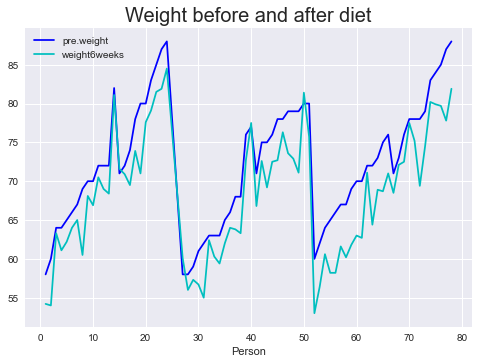

In [18]:
# Biểu đồ cân nặng trước và sau 6 tuần
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8))
plt.style.use('seaborn')
df[['pre.weight', 'weight6weeks']].plot(color= ['blue', 'c'])
plt.title('Weight before and after diet', fontsize=20)

# Nhiệm vụ 2: Tính toán biến
## Loại bỏ trọng lượng đã mất và yêu cầu học sinh tính toán nó bằng cách sử dụng trọng lượng trước / sau 


In [19]:
df['weightlost'] = df['pre.weight'] - df['weight6weeks']
df

,gender,Age,Height,pre.weight,Diet,weight6weeks,weightlost
Person,,,,,,,
1,0,22,159,58,1,54.2,3.8
2,0,46,192,60,1,54.0,6.0
3,0,55,170,64,1,63.3,0.7
4,0,33,171,64,1,61.1,2.9
5,0,50,170,65,1,62.2,2.8
...,...,...,...,...,...,...,...
74,1,35,183,83,3,80.2,2.8
75,1,49,177,84,3,79.9,4.1
76,1,28,164,85,3,79.7,5.3


C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Weight lost')

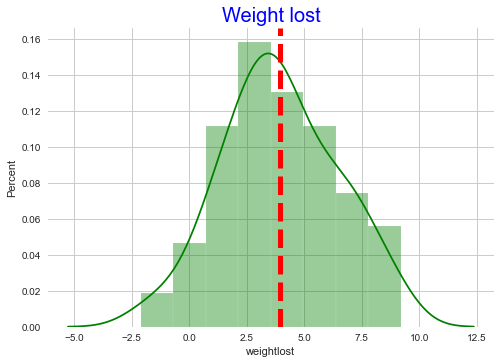

In [20]:
sns.set_style("whitegrid")
sns.distplot(df['weightlost'], color='Green')
plt.ylabel('Percent')
plt.axvline(df['weightlost'].mean(), color="r", linestyle="dashed", linewidth=5)
plt.title('Weight lost', size=20, color='blue')

# Nhiệm vụ 3: Thống kê tóm tắt
## Thống kê tổng hợp theo chế độ ăn uống 

In [21]:
df['Diet'].describe()

count    76.000000
mean      2.039474
std       0.823663
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Diet, dtype: float64

In [22]:
# Bảng tần số
diet = df.groupby('Diet')['Diet'].count()
diet = pd.DataFrame(diet)
diet.columns = ['Frequency']
diet['Percent'] = diet/sum(diet['Frequency'])*100
diet

,Frequency,Percent
Diet,,
1,24,31.578947
2,25,32.894737
3,27,35.526316


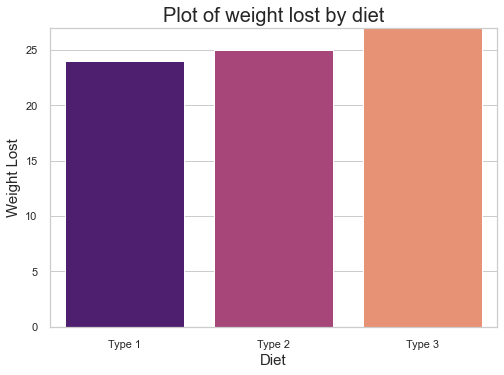

In [23]:
diet.reset_index(inplace=True)
sns.set_theme(style="whitegrid")
g=sns.barplot(x='Diet',y='Frequency',data = diet, palette='magma')
g.set_xticklabels(["Type 1", "Type 2", "Type 3"])
g.set(ylim=(0, 27))
plt.ylabel('Weight Lost',size=15)
plt.xlabel('Diet', size=15)
plt.title('Plot of weight lost by diet', size=20)
plt.show()

# Nhiệm vụ 4:  ANOVA

## 4.1: Chế độ ăn nào tốt nhất để giảm cân? 

Xây dựng giả thiết:

- $H_0: \mu_1 = \mu_2 = \mu_3$

- $H_1: \mu_i \neq \mu_j$ (i $\neq$ j ,  i, j $\in \overline{1,3}$)

In [24]:
task4 = df[['Diet', 'weightlost']]
task4

,Diet,weightlost
Person,,
1,1,3.8
2,1,6.0
3,1,0.7
4,1,2.9
5,1,2.8
...,...,...
74,3,2.8
75,3,4.1
76,3,5.3


In [25]:
diet = task4.groupby('Diet').groups
# Lấy giá trị tương ứng ở cột des_weight 
type_1 = df['weightlost'][diet[1]]
type_1.name = 'Diet Type 1'
type_2 = df['weightlost'][diet[2]]
type_2.name = 'Diet Type 2'
type_3 = df['weightlost'][diet[3]]
type_3.name = 'Diet Type 3'

### Kiểm tra mỗi nhóm có thuộc phân phối chuẩn chưa

#### Sử dụng Shapiro-Wilk test 

Phát biểu giả thiết:

$H_0$: Phân phối của feature là chuẩn

$H_1$: Phân phối của feature là không chuẩn

In [26]:
# Lấy sample(20)
type_1=type_1.sample(20)
type_2=type_2.sample(20)
type_3=type_3.sample(20)

In [27]:
# Hàm kiểm định Shapiro và đồ thị phân phối
from scipy.stats import shapiro
def shapiro_test(data):
    fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))
    sns.distplot(data, ax=axes[0], color='')
    plt.tight_layout()

    data = (data - data.mean()) / data.std()
    sm.qqplot(data,ax=axes[1], line='45')
    plt.tight_layout()
    fig.suptitle(data.name, size=18)

    stat, p = shapiro(data)
    print('Kiểm định Shapiro cho',data.name)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Không thể bác bỏ giả thiết H0: Phân phối của dữ liệu là chuẩn')
        print('Đủ điều kiện để phân tích tiếp')
    else:
        print('Dữ liệu không tuân theo luật phân phối chuẩn')
    print('-'*50)

C:\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

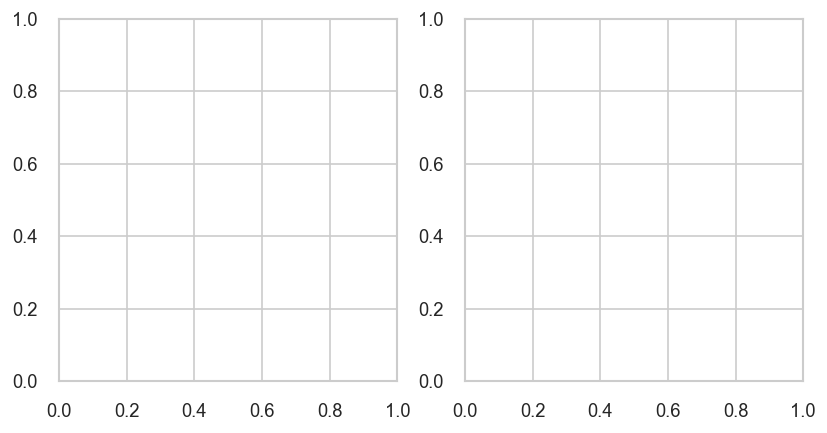

In [46]:
shapiro_test(type_1)

ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

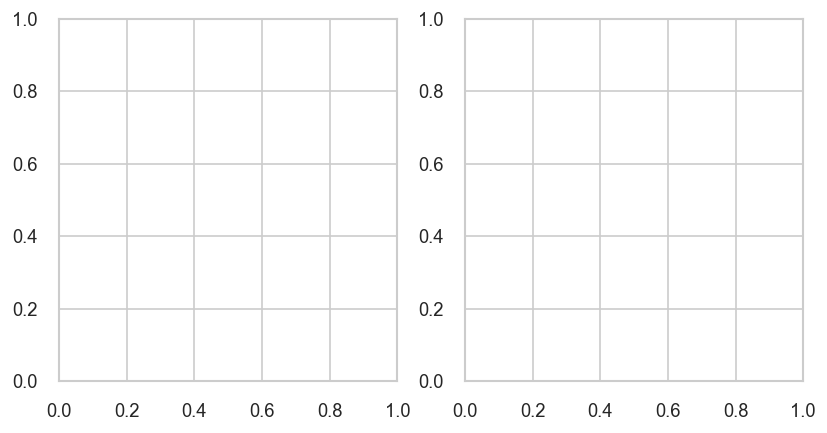

In [47]:
shapiro_test(type_2)

ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

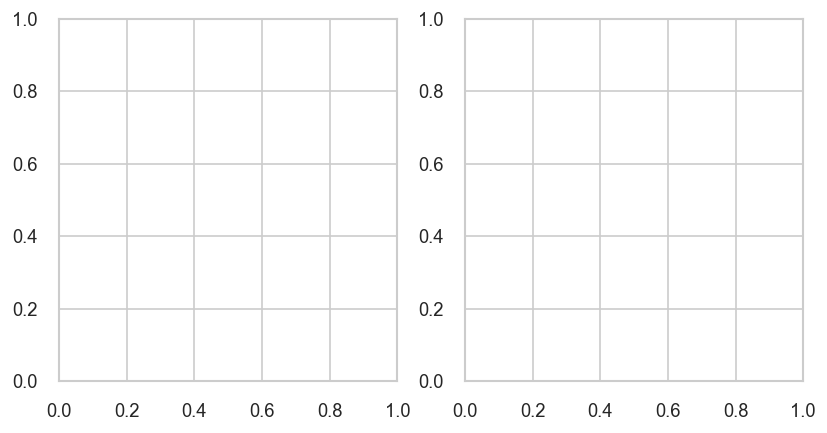

In [48]:
shapiro_test(type_3)

### Kiểm định tính thuần nhất phương sai (homogeneity of variance)

#### Bartlett’s Test

Phát biểu các giả thiết:


$H_0$: Các feature đều có phương sai đồng nhất 

$H_1$: Có ít nhất 2 feature có phương sai khác nhau (lớn)

Chú ý: Nếu p < 0.05 = $\alpha$ thì loại giả thiết $H_0$. Tức là các feature không đồng nhất về phương sai.

In [50]:
def results(p, alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    return df[cols]

In [51]:
p={}
from scipy.stats import bartlett
p['score'], p['p_value'] = bartlett(type_1, type_2, type_3)
if p['p_value'] > 0.05:
    print('Không thể bác bỏ giả thiết H0. Các feature đồng nhất về phương sai')
    print('Đủ điều kiện đê phân tích ANOVA')
else:
    print('Các feature không đồng nhất về phương sai')
results(p)

Không thể bác bỏ giả thiết H0. Các feature đồng nhất về phương sai
Đủ điều kiện đê phân tích ANOVA


,score,p_value,KetLuan
,1.496262,0.47325,Chấp nhận H0 với mức ý nghĩa 0.05


# Phân tích ANOVA

In [52]:
# Tiến hành phân tích ANOVA 1 chiều
p={}
from scipy.stats import f_oneway
p['score'], p['p_value'] = f_oneway(type_1, type_2, type_3)
alpha = 0.05
if (p['p_value'] < alpha):
    print('Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có sự khác biệt')
else:
    print('Không đủ bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp không có sự khác biệt.')
results(p)

Có bằng chứng bác bỏ giả thuyết H0. Điều này ngụ ý rằng hiệu quả giữa các phương pháp có sự khác biệt


,score,p_value,KetLuan
,5.281099,0.007868,Chấp nhận H1 với mức ý nghĩa 0.05


In [53]:
# ANOVA table

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('weightlost ~ C(Diet)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Diet),60.527008,2.0,5.383104,0.006596
Residual,410.401807,73.0,NaN,NaN
